In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from descartes import PolygonPatch
import matplotlib.patheffects as PathEffects

#Importing oblast and rayon level data, plus extra data from a previously created merged df
admin_1 = 'gadm36_KGZ_shp/gadm36_KGZ_1.shp'
admin_2 = 'gadm36_KGZ_shp/gadm36_KGZ_2.shp'
merged = 'merged.csv'

In [20]:
#cleaning oblast-level df
gdf1 = gpd.read_file(admin_1).to_crs('+proj=robin')
gdf1 = gdf1[['GID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1', 'geometry']]
gdf1 = gdf1.rename(columns={'GID_1': 'ID', 'NAME_1': 'Province', 'TYPE_1': 'Type', 'ENGTYPE_1': 'EngType'})
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for x in numbers:
    gdf1 = gdf1.replace(f'KGZ.{x}_1', f'KGZ_{x}_0')
gdf1['label_coords'] = gdf1['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf1['label_coords'] = [coords[0] for coords in gdf1['label_coords']]
gdf1

,ID,Province,Type,EngType,geometry,label_coords
0,KGZ_1_0,Batken,Oblast,Province,"POLYGON ((6238981.196861384 4245105.595245459,...","(6239262.86628911, 4261106.94931831)"
1,KGZ_2_0,Biškek,Shaar,City,"POLYGON ((6390396.463856786 4577444.455025248,...","(6398464.869761699, 4582056.632205758)"
2,KGZ_3_0,Chüy,Oblast,Province,"POLYGON ((6444221.608653411 4578372.932363272,...","(6407080.878538649, 4545348.290481889)"
3,KGZ_4_0,Jalal-Abad,Oblast,Province,"POLYGON ((6389193.219068551 4395988.388868136,...","(6323934.551953496, 4437177.686566411)"
4,KGZ_5_0,Naryn,Oblast,Province,"POLYGON ((6497491.200896136 4330506.184849281,...","(6570161.1885289, 4421360.876231066)"
5,KGZ_7_0,Osh,Oblast,Province,"POLYGON ((6286761.652303263 4205393.839947541,...","(6381721.375171071, 4293393.476950216)"
6,KGZ_6_0,Osh (city),Shaar,City,"POLYGON ((6321325.471923003 4336570.733991264,...","(6321453.361008662, 4330839.092544103)"
7,KGZ_8_0,Talas,Oblast,Province,"POLYGON ((6189600.525889264 4566584.046323682,...","(6199225.080052385, 4535375.280235746)"
8,KGZ_9_0,Ysyk-Köl,Oblast,Province,"POLYGON ((6825988.21908363 4541709.682039291, ...","(6716261.792306483, 4492786.8668598905)"


In [248]:
#cleaning rayon-level df
gdf2 = gpd.read_file(admin_2).to_crs('+proj=robin')
gdf2 = gdf2[['GID_2', 'NAME_1', 'NAME_2', 'TYPE_2', 'ENGTYPE_2', 'geometry']]
gdf2 = gdf2.rename(columns={'GID_2': 'ID', 'NAME_1': 'Province', 'NAME_2': 'District', 'TYPE_2': 'Type', 'ENGTYPE_2': 'EngType'})
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for x in numbers:
    gdf2 = gdf2.replace(f'KGZ.{x}_1', f'KGZ_{x}')
    for y in numbers:
        gdf2 = gdf2.replace(f'KGZ.{x}.{y}_1', f'KGZ_{x}_{y}')
gdf2['label_coords'] = gdf2['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf2['label_coords'] = [coords[0] for coords in gdf2['label_coords']]
kg_admin_2 = gdf2

# adding column for project location count
kg_admin_2['Count of Project Sites'] = 0
kg_admin_2.iloc[30, 7] = 3
kg_admin_2.iloc[31, 7] = 2
kg_admin_2.iloc[27, 7] = 2
kg_admin_2.iloc[32, 7] = 3
kg_admin_2.iloc[17, 7] = 3
kg_admin_2.iloc[14, 7] = 2
kg_admin_2.iloc[13, 7] = 2
kg_admin_2.iloc[12, 7] = 1
kg_admin_2.iloc[5, 7] = 2
kg_admin_2.iloc[6, 7] = 1
kg_admin_2.iloc[39, 7] = 2
kg_admin_2.iloc[36, 7] = 1
kg_admin_2.iloc[37, 7] = 1
kg_admin_2.iloc[22, 7] = 1
kg_admin_2.iloc[23, 7] = 1

kg_admin_2

,ID,Province,District,Type,EngType,geometry,label_coords,Count of Project Sites
0,KGZ_1_1,Batken,Batken,Rayon,District,"(POLYGON ((6203417.02618135 4268307.428236105,...","(6185407.716867298, 4258489.961854106)",0
1,KGZ_1_2,Batken,Kadamjai,Rayon,District,"POLYGON ((6201919.666596727 4270320.200173633,...","(6222992.646682451, 4275635.804738582)",0
2,KGZ_1_3,Batken,Lailak,Rayon,District,"POLYGON ((6040365.708206338 4250254.155546723,...","(6075062.430949885, 4262422.396222519)",0
3,KGZ_2_1,Biškek,Biškek,Shaar,City,"POLYGON ((6390396.464086209 4577444.455273997,...","(6398464.869632913, 4582056.632355917)",0
4,KGZ_3_1,Chüy,Alamüdün,Rayon,District,(POLYGON ((6386303.449574289 4582067.718314261...,"(6399677.900411103, 4555290.286408551)",0
5,KGZ_3_2,Chüy,Chui,Rayon,District,"POLYGON ((6448074.695403462 4534269.871732781,...","(6466263.03233532, 4555864.645725016)",2
6,KGZ_3_3,Chüy,Jaiyl,Rayon,District,(POLYGON ((6335319.667482986 4611926.932359271...,"(6379974.914354952, 4496376.033622286)",1
7,KGZ_3_4,Chüy,Kemin,Rayon,District,"POLYGON ((6619543.392620769 4585334.136597544,...","(6512595.756790746, 4564767.763282573)",0
8,KGZ_3_5,Chüy,Moskovsky,Rayon,District,"POLYGON ((6335319.667482986 4611926.932359271,...","(6351579.559028436, 4570161.369138224)",0
9,KGZ_3_6,Chüy,Panfilov,Rayon,District,(POLYGON ((6328843.773709675 4535902.454444233...,"(6314017.119386812, 4510010.240663234)",0


In [21]:
#prepping previously created merged df for merging with oblast-level df
kg_df = pd.read_csv(merged)
kg_df = kg_df.replace('KG-Y', 'KGZ_9_0')
kg_df = kg_df.replace('KG-N', 'KGZ_5_0')
kg_df = kg_df.replace('KG-O', 'KGZ_7_0')
kg_df = kg_df.replace('KG-C', 'KGZ_3_0')
kg_df = kg_df.replace('KG-T', 'KGZ_8_0')
kg_df = kg_df.replace('KG-J', 'KGZ_4_0')
kg_df = kg_df.replace('KG-B', 'KGZ_1_0')
kg_df = kg_df.replace('KG-GB', 'KGZ_2_0')
kg_df = kg_df[['iso_3166_2', 'Kyrgyz', 'Russian', 'Capital', 'Area (km²)', 'Population (2015 est.)']]
kg_df

,iso_3166_2,Kyrgyz,Russian,Capital,Area (km²),Population (2015 est.)
0,KGZ_9_0,Ысык-Көл облусу,Иссык-Кульская область,Karakol,43735,463900
1,KGZ_5_0,Нарын облусу,Нарынская область,Naryn,44160,264900
2,KGZ_7_0,Ош облусу,Ошская область,Osh,28934,1228400
3,KGZ_3_0,Чүй облусу,Чуйская область,Bishkek,19895,870300
4,KGZ_8_0,Талас облусу,Таласская область,Talas,13406,247200
5,KGZ_4_0,Жалалабат облусу,Джалал-Абадская область,Jalal-Abad,32418,1122400
6,KGZ_1_0,Баткен облусу,Баткенская область,Batken,17048,480700
7,KGZ_2_0,Бишкек шаары,Город Бишкек,Bishkek,170,937400


In [145]:
kg_admin_1 = gdf1.merge(kg_df, left_on='ID', right_on='iso_3166_2', how='outer')
kg_admin_1 = kg_admin_1[['ID', 'Province', 'Kyrgyz', 'Russian', 'Type', 'EngType', 'Area (km²)', 'Population (2015 est.)', 'geometry', 'label_coords']]

# adding column for project location count
kg_admin_1['Count of Project Sites'] = 0
kg_admin_1.iloc[2, 10] = 3
kg_admin_1.iloc[3, 10] = 8
kg_admin_1.iloc[4, 10] = 2
kg_admin_1.iloc[5, 10] = 10
kg_admin_1.iloc[7, 10] = 2
kg_admin_1.iloc[8, 10] = 2
kg_admin_1.iloc[6, 2] = 'Ош шаары'
kg_admin_1.iloc[6, 3] = 'Город Ош'
kg_admin_1.iloc[6, 6] = 182
kg_admin_1.iloc[6, 7] = 250828

kg_admin_1

,ID,Province,Kyrgyz,Russian,Type,EngType,Area (km²),Population (2015 est.),geometry,label_coords,Count of Project Sites
0,KGZ_1_0,Batken,Баткен облусу,Баткенская область,Oblast,Province,17048.0,480700.0,"POLYGON ((6238981.196861384 4245105.595245459,...","(6239262.86628911, 4261106.94931831)",0
1,KGZ_2_0,Biškek,Бишкек шаары,Город Бишкек,Shaar,City,170.0,937400.0,"POLYGON ((6390396.463856786 4577444.455025248,...","(6398464.869761699, 4582056.632205758)",0
2,KGZ_3_0,Chüy,Чүй облусу,Чуйская область,Oblast,Province,19895.0,870300.0,"POLYGON ((6444221.608653411 4578372.932363272,...","(6407080.878538649, 4545348.290481889)",3
3,KGZ_4_0,Jalal-Abad,Жалалабат облусу,Джалал-Абадская область,Oblast,Province,32418.0,1122400.0,"POLYGON ((6389193.219068551 4395988.388868136,...","(6323934.551953496, 4437177.686566411)",8
4,KGZ_5_0,Naryn,Нарын облусу,Нарынская область,Oblast,Province,44160.0,264900.0,"POLYGON ((6497491.200896136 4330506.184849281,...","(6570161.1885289, 4421360.876231066)",2
5,KGZ_7_0,Osh,Ош облусу,Ошская область,Oblast,Province,28934.0,1228400.0,"POLYGON ((6286761.652303263 4205393.839947541,...","(6381721.375171071, 4293393.476950216)",10
6,KGZ_6_0,Osh (city),Ош шаары,Город Ош,Shaar,City,182.0,250828.0,"POLYGON ((6321325.471923003 4336570.733991264,...","(6321453.361008662, 4330839.092544103)",0
7,KGZ_8_0,Talas,Талас облусу,Таласская область,Oblast,Province,13406.0,247200.0,"POLYGON ((6189600.525889264 4566584.046323682,...","(6199225.080052385, 4535375.280235746)",2
8,KGZ_9_0,Ysyk-Köl,Ысык-Көл облусу,Иссык-Кульская область,Oblast,Province,43735.0,463900.0,"POLYGON ((6825988.21908363 4541709.682039291, ...","(6716261.792306483, 4492786.8668598905)",2


In [124]:
#merging oblast and rayon dfs on all common columns
kg_admin_1_2 = kg_admin_1.merge(gdf2, on=['ID', 'Province', 'Type', 'EngType', 'label_coords'], how='outer')

#geometry cannot serve as a key for merging because it is a column, so must use fillna and renaming to create unified column 
kg_admin_1_2['geometry_x'] = kg_admin_1_2['geometry_x'].fillna(kg_admin_1_2['geometry_y'])
kg_admin_1_2 = kg_admin_1_2.rename(columns={'geometry_x': 'geometry'})
kg_admin_1_2 = kg_admin_1_2.drop(['geometry_y'], axis=1)

kg_admin_1_2

,ID,Province,Kyrgyz,Russian,Type,EngType,Area (km²),Population (2015 est.),geometry,label_coords,District,Count of Project Sites
0,KGZ_1_0,Batken,Баткен облусу,Баткенская область,Oblast,Province,17048.0,480700.0,"POLYGON ((6238981.196861384 4245105.595245459,...","(6239262.86628911, 4261106.94931831)",NaN,5
1,KGZ_2_0,Biškek,Бишкек шаары,Город Бишкек,Shaar,City,170.0,937400.0,"POLYGON ((6390396.463856786 4577444.455025248,...","(6398464.869761699, 4582056.632205758)",NaN,5
2,KGZ_3_0,Chüy,Чүй облусу,Чуйская область,Oblast,Province,19895.0,870300.0,"POLYGON ((6444221.608653411 4578372.932363272,...","(6407080.878538649, 4545348.290481889)",NaN,3
3,KGZ_4_0,Jalal-Abad,Жалалабат облусу,Джалал-Абадская область,Oblast,Province,32418.0,1122400.0,"POLYGON ((6389193.219068551 4395988.388868136,...","(6323934.551953496, 4437177.686566411)",NaN,8
4,KGZ_5_0,Naryn,Нарын облусу,Нарынская область,Oblast,Province,44160.0,264900.0,"POLYGON ((6497491.200896136 4330506.184849281,...","(6570161.1885289, 4421360.876231066)",NaN,2
5,KGZ_7_0,Osh,Ош облусу,Ошская область,Oblast,Province,28934.0,1228400.0,"POLYGON ((6286761.652303263 4205393.839947541,...","(6381721.375171071, 4293393.476950216)",NaN,10
6,KGZ_6_0,Osh (city),NaN,NaN,Shaar,City,NaN,NaN,"POLYGON ((6321325.471923003 4336570.733991264,...","(6321453.361008662, 4330839.092544103)",NaN,5
7,KGZ_8_0,Talas,Талас облусу,Таласская область,Oblast,Province,13406.0,247200.0,"POLYGON ((6189600.525889264 4566584.046323682,...","(6199225.080052385, 4535375.280235746)",NaN,2
8,KGZ_9_0,Ysyk-Köl,Ысык-Көл облусу,Иссык-Кульская область,Oblast,Province,43735.0,463900.0,"POLYGON ((6825988.21908363 4541709.682039291, ...","(6716261.792306483, 4492786.8668598905)",NaN,2
9,KGZ_1_1,Batken,NaN,NaN,Rayon,District,NaN,NaN,"(POLYGON ((6203417.02618135 4268307.428236105,...","(6185407.716867298, 4258489.961854106)",Batken,5


In [163]:
#setting parameters
colors = 5
cmap = 'Blues'
figsize = (16, 10)

# creating list of districts to label in for-loup below
districts=[]

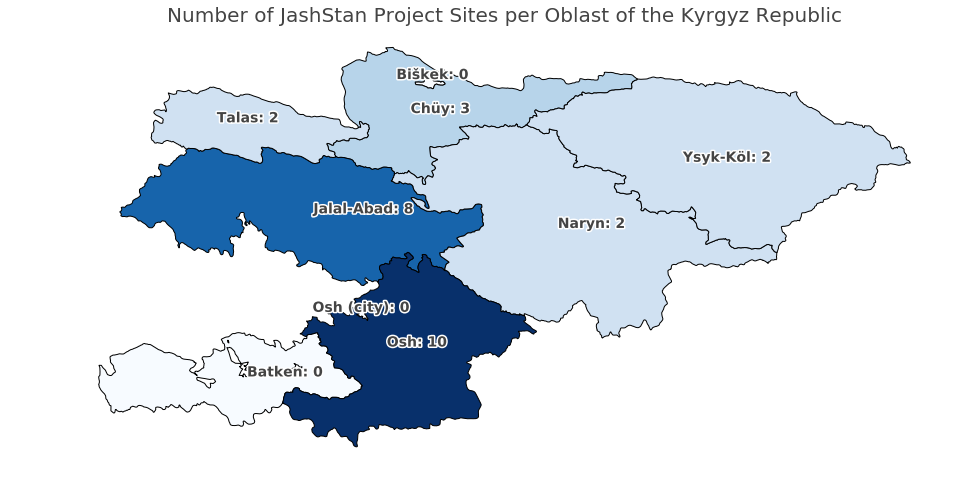

In [245]:


#plotting
ax = kg_admin_1.dropna().plot(column=kg_admin_1['Count of Project Sites'], cmap=cmap, figsize=figsize, k=colors, legend=False, edgecolor='black')
ax.set_axis_off()
# ax.get_legend().set_bbox_to_anchor((.9, .3))
title = 'Number of JashStan Project Sites per Oblast of the Kyrgyz Republic'
ax.set_title(title, color='#444444', fontdict={'fontsize': 20}, loc='center')
for idx, row in kg_admin_1.iterrows():
    label = f"{row['Province']}: {row['Count of Project Sites']}"
    txt = plt.annotate(s=label, xy=row['label_coords'],
             color='#444444', fontsize=14, weight='bold', ha='center', va='bottom')
    txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
#         plt.annotate(s=row['Russian'], xy=row['coords'],
#                  color='red', horizontalalignment='left')


    plt.savefig(f'{title}.png')

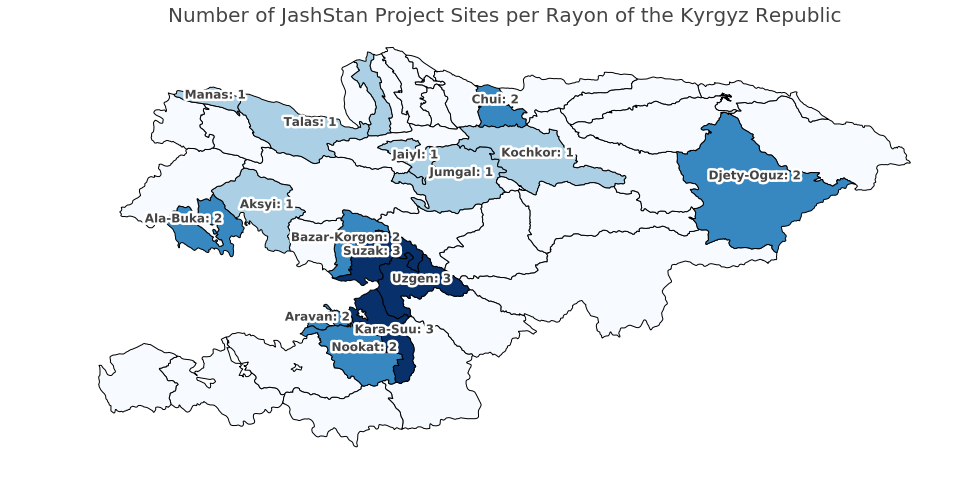

In [254]:


#plotting
ax = kg_admin_2.dropna().plot(column=kg_admin_2['Count of Project Sites'], cmap=cmap, figsize=figsize, k=colors, legend=False, edgecolor='black')
ax.set_axis_off()
# ax.get_legend().set_bbox_to_anchor((.9, .3))
title = 'Number of JashStan Project Sites per Rayon of the Kyrgyz Republic'
ax.set_title(title, color='#444444', fontdict={'fontsize': 20}, loc='center')
for idx, row in kg_admin_2.iterrows():
    if row['Count of Project Sites'] != 0:
        label = f"{row['District']}: {row['Count of Project Sites']}"
        txt = plt.annotate(s=label, xy=row['label_coords'],
                 color='#444444', fontsize=12, weight='bold', ha='center', va='bottom')
        txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    #         plt.annotate(s=row['Russian'], xy=row['coords'],
    #                  color='red', horizontalalignment='left')


    plt.savefig(f'{title}.png')

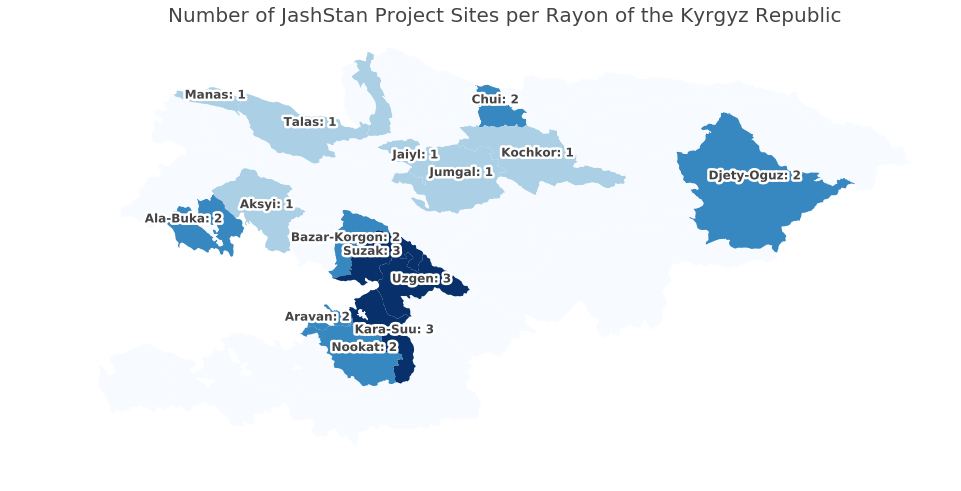

In [258]:


#plotting
ax = kg_admin_2.dropna().plot(column=kg_admin_2['Count of Project Sites'], cmap=cmap, figsize=figsize, k=colors, legend=False)
ax.set_axis_off()
# ax.get_legend().set_bbox_to_anchor((.9, .3))
title = 'Number of JashStan Project Sites per Rayon of the Kyrgyz Republic'
ax.set_title(title, color='#444444', fontdict={'fontsize': 20}, loc='center')
for idx, row in kg_admin_2.iterrows():
    if row['Count of Project Sites'] != 0:
        ax.plot(edgecolor='black')
        label = f"{row['District']}: {row['Count of Project Sites']}"
        txt = plt.annotate(s=label, xy=row['label_coords'],
                 color='#444444', fontsize=12, weight='bold', ha='center', va='bottom')
        txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    #         plt.annotate(s=row['Russian'], xy=row['coords'],
    #                  color='red', horizontalalignment='left')


#     plt.savefig(f'{title}.png')